<a href="https://colab.research.google.com/github/camilaandreasbs/Laboratorio-DS/blob/master/Laboratorio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Camila Bergasa
- Nombre de alumno 2: Sebastián García


### **Link de repositorio de GitHub:** `https://github.com/camilaandreasbs/Laboratorio-DS/blob/master/Laboratorio7.ipynb`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

#Importamos librerias utiles 😸

In [236]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# UMAP
!pip install umap-learn

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [237]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/LaboratorioDS/Lab7/stats_players.csv'
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
df_players = pd.read_csv('/content/drive/MyDrive/LaboratorioDS/Lab7/stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,1,12,11,12,12,13,25,48,12,37,35,12,22,19,25,21,17,52,52,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,1,13,11,11,12,11,15,43,12,27,22,14,27,26,16,19,21,42,45,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,2,44,39,40,29,35,44,42,38,41,35,35,48,42,62,60,64,34,83,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,1,17,13,11,11,14,23,46,12,13,28,15,20,15,42,40,40,61,60,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [137]:
### Código aquí ###
df_players.National_Position.unique()

array(['LS', 'RW', 'LW', 'GK', 'RS', nan, 'RCB', 'LF', 'CAM', 'Sub',
       'LCB', 'RCM', 'LDM', 'LCM', 'LAM', 'CB', 'CDM', 'LM', 'RM', 'LB',
       'ST', 'CM', 'RF', 'RB', 'RDM', 'RAM', 'LWB', 'RWB'], dtype=object)

Se aprecia que existen 27 clases del atributo National Position

In [138]:
players = df_players.groupby(["National_Position"])
players["Name"].nunique()

National_Position
CAM     19
CB       9
CDM      9
CM       9
GK      47
LAM      4
LB      39
LCB     48
LCM     25
LDM     19
LF       3
LM      32
LS      18
LW       7
LWB      4
RAM      4
RB      38
RCB     46
RCM     25
RDM     18
RF       3
RM      34
RS      18
RW       7
RWB      4
ST      30
Sub    556
Name: Name, dtype: int64

In [139]:
df_players['National_Position'].isna().sum()

16513

In [140]:
pd.notnull(df_players['National_Position'])

0         True
1         True
2         True
3         True
4         True
         ...  
17583    False
17584    False
17585    False
17586    False
17587    False
Name: National_Position, Length: 17588, dtype: bool

In [141]:
df_players['Seleccionado'] = ''
df_players.loc[pd.notnull(df_players['National_Position']) == False, 'Seleccionado'] = 0
df_players.loc[pd.notnull(df_players['National_Position']) == True, 'Seleccionado'] = 1
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,1,12,11,12,12,13,25,48,12,37,35,12,22,19,25,21,17,52,52,27,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,1,13,11,11,12,11,15,43,12,27,22,14,27,26,16,19,21,42,45,28,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,2,44,39,40,29,35,44,42,38,41,35,35,48,42,62,60,64,34,83,54,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,1,17,13,11,11,14,23,46,12,13,28,15,20,15,42,40,40,61,60,34,48,15,23,14,12,13,12,24,12,0


Cantidad de jugadores existentes por cada posición

In [142]:
# Eliminamos la columna ya que se generó la columna 'Seleccionado' que indica cuando el jugador está seleccionado y cuando no lo está
df_players = df_players.drop(columns = ['National_Position'])


In [143]:
df_players.head()


,Name,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
0,Cristiano Ronaldo,Portugal,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,1


### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="http://vignette3.wikia.nocookie.net/inciclopedia/images/c/cd/Patada_Medel_Messi.gif/revision/latest?cb=20150705215005" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

In [144]:
# Se eliminan las variables Weak_foot y Skill_Moves por tratarse de variables ordinales.
df_num = df_players.select_dtypes(include = np.number).drop(columns = ['Weak_foot', 'Skill_Moves'])
df_num

,Height,Weight,Age,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,185,80,32,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,170,72,29,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,174,68,25,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,182,85,30,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,193,92,31,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,183,82,19,12,11,12,12,13,25,48,12,37,35,12,22,19,25,21,17,52,52,27,56,14,16,13,13,11,13,15,12
17584,185,80,19,13,11,11,12,11,15,43,12,27,22,14,27,26,16,19,21,42,45,28,53,12,17,12,11,12,13,16,12
17585,173,61,18,44,39,40,29,35,44,42,38,41,35,35,48,42,62,60,64,34,83,54,61,41,44,28,42,35,36,42,37
17586,180,80,21,17,13,11,11,14,23,46,12,13,28,15,20,15,42,40,40,61,60,34,48,15,23,14,12,13,12,24,12


In [145]:
df_num.columns

Index(['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object')

In [146]:
num_col = ['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']

In [147]:
# Se elimina la columna seleccionado ya que es la variable a predecir.
df_cat = df_players.select_dtypes(include = np.object)
df_cat = df_cat.drop(columns = ['Seleccionado'])


In [148]:
df_cat

,Name,Nationality,Club_Position,Preffered_Foot,Work_Rate
0,Cristiano Ronaldo,Portugal,LW,Right,High / Low
1,Lionel Messi,Argentina,RW,Left,Medium / Medium
2,Neymar,Brazil,LW,Right,High / Medium
3,Luis Suárez,Uruguay,ST,Right,High / Medium
4,Manuel Neuer,Germany,GK,Right,Medium / Medium
...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,Sub,Right,Medium / Medium
17584,Dylan McGoey,Republic of Ireland,Sub,Right,Medium / Medium
17585,Tommy Ouldridge,England,Res,Right,High / Medium
17586,Mark Foden,Scotland,Sub,Right,Medium / Medium


In [149]:
df_ordinal = df_players[['Weak_foot', 'Skill_Moves']]
df_ordinal

,Weak_foot,Skill_Moves
0,4,5
1,4,4
2,5,5
3,4,4
4,4,1
...,...,...
17583,1,1
17584,2,1
17585,2,2
17586,3,1


In [150]:
ordinal_cat = [['1', '2', '3', '4', '5'], ['1', '2', '3', '4', '5']]

Para las variables categóricas se utiliza la transformación One Hot Encoder ya que la variable tomará el valor 1 si pertenece a una nacionalidad y 0 si no pertenece.

Para las variables numéricas se utiliza StandarScaler para dejarlas estandarizadas y que tomen valores entre 0 y 1.

Finalmente para las variables ordinales se utiliza Ordinal Encoder, esto con el objetivo de dejarlas con un valor numérico en base a su rango.

In [151]:
### Código aquí ###

preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(sparse=False, handle_unknown='ignore'),  ['Nationality',	'Club_Position',	'Preffered_Foot',	'Work_Rate']),
        ('StandardScaler', StandardScaler(), num_col), 
        ('OrdinalEncoder', OrdinalEncoder(categories=ordinal_cat), ['Weak_foot', 'Skill_Moves'])])

In [152]:
pipe = Pipeline([('Preprocessing', preprocessing_transformer)])

In [153]:
proyeccion = pipe.fit_transform(df_players)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [155]:
pipeline_KN = Pipeline([('Preprocessing', preprocessing_transformer),('KNeighborsClassifier', KNeighborsClassifier())])

In [156]:
pipeline_DTC = Pipeline([(('Preprocessing', preprocessing_transformer)),('DecisionTreeClassifier', DecisionTreeClassifier(random_state = 1))])

In [157]:
pipeline_GaussianNB = Pipeline([(('Preprocessing', preprocessing_transformer)),('GaussianNB', GaussianNB())])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [158]:
df_players['Seleccionado'] = pd.to_numeric(df_players['Seleccionado'])

In [159]:
features = df_players.drop(columns=['Name','Seleccionado'])
#labels = df_players[['Seleccionado']]
labels = df_players.loc[:,"Seleccionado"]

In [160]:
labels

0        1
1        1
2        1
3        1
4        1
        ..
17583    0
17584    0
17585    0
17586    0
17587    0
Name: Seleccionado, Length: 17588, dtype: int64

In [161]:
# Se separan los datos de entrenamiento en un conjunto de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, shuffle = True, stratify = labels)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [162]:
X_train.shape

(11783, 37)

In [163]:
X_test.shape

(5805, 37)

In [164]:
# Distribución Original
labels.value_counts() / labels.count() * 100

0    93.887878
1     6.112122
Name: Seleccionado, dtype: float64

In [165]:
# Conjunto de entrenamiento
y_train.value_counts() / y_train.count() * 100


0    93.889502
1     6.110498
Name: Seleccionado, dtype: float64

In [166]:
# Conjunto de pruebas
y_test.value_counts() / y_test.count() * 100

0    93.884582
1     6.115418
Name: Seleccionado, dtype: float64

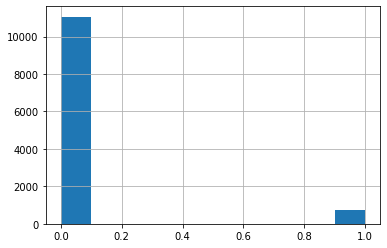

In [167]:
y_train.hist()

In [168]:
# Entrenamiento de los pipelines
X_train_preprocessed = pd.DataFrame(
    preprocessing_transformer.fit_transform(X_train)
    )

X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.317966,-0.907066,0.752426,0.781307,1.022623,-1.542549,-0.304565,-0.935047,-0.914218,0.569174,-0.621069,1.191254,1.207934,0.510882,0.596874,0.232580,1.855463,1.883338,0.550537,-0.565699,0.735414,1.430055,-0.245709,-0.592075,0.708175,0.925682,0.866816,1.077702,0.373005,-0.324521,0.835580,3.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.019349,-0.185346,0.539177,0.364912,0.652839,-1.496060,-1.515340,-1.530985,1.774307,1.977164,-0.230476,-0.251725,0.909971,-0.193692,-0.336022,-0.982317,0.475655,0.824192,-0.480072,-0.008851,-0.205217,0.134347,-1.114980,0.668479,0.992534,0.461108,-0.120376,0.480909,-0.814239,-0.198328,0.327639,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.577883,1.979817,0.112678,-2.014489,-2.041302,-1.263615,-1.561909,-1.714351,-1.829461,1.435629,-1.548728,-0.938858,-0.430861,-1.602841,-1.802000,-1.685679,-0.421220,-0.517393,-1.768333,0.547997,-1.218205,-0.002043,0.623561,-2.253715,1.049406,-1.603663,-1.731057,0.969194,1.447179,-1.775739,-1.309057,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.175116,1.113752,0.325928,-0.051483,-0.456513,1.432740,1.139051,1.219499,1.945915,0.677481,1.331897,-0.938858,0.612008,0.348288,0.463603,0.616232,-0.766172,-1.011661,0.550537,1.343495,-0.494642,-0.274824,0.275853,1.298756,0.537559,-0.209942,0.658986,-0.549915,-0.022743,0.117154,-1.026868,2.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.213815,-1.051411,-1.380066,-0.646334,-0.245208,0.177540,0.347391,0.073464,-0.571002,-1.272043,0.404238,-1.419851,-1.473731,0.402486,0.197062,-0.534724,1.717482,1.742118,0.421711,-1.440747,1.024839,1.020884,1.145123,0.210096,-1.566703,-0.829374,-0.899738,-1.146709,-0.531562,-0.766196,-0.857555,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.727192,1.691129,0.112678,-1.062729,-1.090428,0.688918,0.766505,0.715243,0.573051,-1.055429,0.355414,-1.351138,-0.654333,-0.410485,-0.202751,-0.151072,0.337674,0.471143,0.937015,1.184396,0.373633,0.202542,-0.593417,0.496585,-1.111728,-0.519658,-0.743865,-0.766931,-0.418491,-0.955486,-0.688242,2.0,1.0
11779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.616582,-0.329690,0.539177,0.126972,0.388708,-1.217127,-1.235931,-1.668509,-1.600650,-0.947122,-1.548728,-0.526578,-0.356371,0.836070,0.530239,0.424406,0.820607,1.106631,0.421711,0.388898,0.663058,0.816299,-0.593

In [169]:
# Entrenamiento del Arbol
tree_pipe = Pipeline(
    [("preprocesamiento", preprocessing_transformer), ("tree", DecisionTreeClassifier(criterion="entropy"))]
)

# noten que aquí se pasa X_train ya que la etapa de
# preprocesamiento está incluida en el pipeline (primera etapa)

tree_pipe = tree_pipe.fit(X_train, y_train)

In [170]:
y_pred = tree_pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [171]:
from sklearn.metrics import confusion_matrix
print("Matriz de confusión\n\n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matriz de confusión

 [[5225  225]
 [ 245  110]] 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5450
           1       0.33      0.31      0.32       355

    accuracy                           0.92      5805
   macro avg       0.64      0.63      0.64      5805
weighted avg       0.92      0.92      0.92      5805



In [172]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5450
           1       0.33      0.31      0.32       355

    accuracy                           0.92      5805
   macro avg       0.64      0.63      0.64      5805
weighted avg       0.92      0.92      0.92      5805



In [ ]:
# Entrenamiento del KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier


neigh_pipe = Pipeline(
    [("preprocesamiento", preprocessing_transformer), 
     ("knn", KNeighborsClassifier(n_neighbors=3))]
)
neigh_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
               

In [126]:
y_pred = neigh_pipe.predict(X_test)

In [127]:
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))

Matriz de confusión
 [[5388  317]
 [  62   38]]


In [121]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      5705
           1       0.11      0.38      0.17       100

    accuracy                           0.93      5805
   macro avg       0.55      0.66      0.57      5805
weighted avg       0.97      0.93      0.95      5805



In [125]:
### Código aquí ###
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

X_train_only_numeric = X_train.drop(
    columns=['Nationality',	'Club_Position',	'Preffered_Foot',	'Work_Rate', 'Weak_foot', 'Skill_Moves']
)
X_test_only_numeric = X_test.drop(
    columns=['Nationality',	'Club_Position',	'Preffered_Foot',	'Work_Rate', 'Weak_foot', 'Skill_Moves']
)

scaler = StandardScaler()



nb_pipe = Pipeline([("scaler", StandardScaler()), ("nb", GaussianNB())])
# Entrenamos
nb_pipe.fit(X_train_only_numeric, y_train)

# Predecimos
y_pred = nb_pipe.predict(X_test_only_numeric)

# Evaluamos
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Matriz de confusión
 [[4477  174]
 [ 973  181]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4651
           1       0.51      0.16      0.24      1154

    accuracy                           0.80      5805
   macro avg       0.67      0.56      0.56      5805
weighted avg       0.76      0.80      0.76      5805



**Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función classification_report para corroborar sus resultados.**

**¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?**

El accuracy es una métrica de desempeño que se basa en contar datos correcta e incorrectamente clasificados, en particular, el accuracy corresponde al número de predicciones correctas dividido en la cantidad de predicciones totales. El mayor accuracy reportado fue para KNeighbors con un valor de 0.93, esto indica que se predijo bien la clase el 93% de las veces. 

Por otro lado, precision y recall corresponden a métricas basadas en los valores de la matriz de confusión. Precision corresponde a la fracción de positivos que son realmente predecidos como positivos, por ejemplo, en el tercer caso (Naive Bayes), precision de la clase positiva, es decir cuando el label es 1 corresponde a 181/(181+174)= 0.51, esto es, True Negative/(True Negative + False Negative).

Recall corresponde a la fracción de ejemplos positivos que fueron correctamente clasificados, es decir, los que son correctamente clasificados como positivos dividido en todos los que deberían gaber sido clasificados como positivos. Para el caso de la etiqueta 1 es True Negative/ (True Negative + False Positive), por ejemplo para el casod e Naive bayes se tuvo que 181/(181 + 973) = 0.16


**¿Podrían mejorarse los resultados?, ¿Cómo? ¿Influye la cantidad de ejemplos por clase?**

Los resultados podrian mejorarse balanceando la data.

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [ ]:
### Código aquí ###
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

In [240]:
df_players = pd.read_csv('/content/drive/MyDrive/LaboratorioDS/Lab7/stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,1,12,11,12,12,13,25,48,12,37,35,12,22,19,25,21,17,52,52,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,1,13,11,11,12,11,15,43,12,27,22,14,27,26,16,19,21,42,45,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,2,44,39,40,29,35,44,42,38,41,35,35,48,42,62,60,64,34,83,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,1,17,13,11,11,14,23,46,12,13,28,15,20,15,42,40,40,61,60,34,48,15,23,14,12,13,12,24,12


In [241]:
data = df_players

In [242]:
def f(row):
    if row['Club_Position'] == "CF" or row["Club_Position"]== "ST":
        val = "ataque"
    elif row['Club_Position'] == "LW" or row['Club_Position'] == "RW" or row["Club_Position"]=="CAM":
        val = "central_ataque"
    elif row['Club_Position'] == "RM" or row['Club_Position'] == "CM" or row["Club_Position"]=="LM":
        val = "central"
    elif row['Club_Position'] == "RWB" or row['Club_Position'] == "CDM" or row["Club_Position"]=="LWB":
        val = "central_defensa"
    elif row['Club_Position'] == "RB" or row['Club_Position'] == "CB" or row["Club_Position"]=="LB":
        val = "defensa"
    elif row['Club_Position'] == "GK":
        val = "arquero"
    else:
        val = "No_usar"
    return val

In [243]:
data['posicion'] = data.apply(f, axis=1)

In [244]:
data.groupby(["posicion"]).size().reset_index(name="cantidad de jugadores por posicion(clase)")

,posicion,cantidad de jugadores por posicion(clase)
0,No_usar,13649
1,arquero,632
2,ataque,430
3,central,907
4,central_ataque,581
5,central_defensa,209
6,defensa,1180


In [245]:
df = data.drop(data[data['posicion']=="No_usar"].index)

In [246]:
df.shape

(3939, 40)

In [247]:
df = df.drop(['Club_Position'], axis=1)

In [248]:
from sklearn.model_selection import train_test_split


features = df.drop(columns=["posicion"])
labels = df.loc[:, "posicion"]

In [249]:
features = features.drop(['Name'], axis=1)


In [250]:
display(features)
display(labels)

,Nationality,National_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Portugal,LS,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Argentina,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Brazil,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Uruguay,LS,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Germany,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17298,Norway,NaN,185,75,Right,18,Medium / Medium,2,2,29,28,47,52,60,46,50,54,35,43,30,28,23,64,58,59,57,58,40,65,44,35,22,25,24,22,41,31
17301,Republic of Ireland,NaN,175,73,Left,21,Medium / Medium,3,2,37,50,46,57,57,53,46,50,36,37,44,31,25,62,61,57,51,73,57,55,43,26,28,29,30,30,31,20
17310,England,NaN,180,80,Right,26,Medium / Medium,3,3,42,53,22,32,22,39,35,21,47,50,44,44,42,82,85,50,54,66,54,54,22,38,37,37,37,32,29,29
17312,England,NaN,182,83,Right,24,Medium / Medium,4,2,49,49,49,43,43,48,44,59,34,39,40,38,42,69,69,64,46,42,58,61,43,22,24,28,30,32,39,31


0        central_ataque
1        central_ataque
2        central_ataque
3                ataque
4               arquero
              ...      
17298           defensa
17301           defensa
17310           central
17312           defensa
17442           defensa
Name: posicion, Length: 3939, dtype: object

In [251]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels
)

In [252]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

ct = ColumnTransformer(
    [
        ("Scaler",
         RobustScaler(),
         [
             'Height', 'Weight', 'Age', "Weak_foot", "Skill_Moves", 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys',
        ]),
        
        ("OneHot", 
         OneHotEncoder(sparse=False, handle_unknown="ignore"), 
         [
             'Nationality', 
             "National_Position", "Preffered_Foot", "Work_Rate"
         ]),
    ]
)

In [253]:
X_train_preprocessed = pd.DataFrame(
    ct.fit_transform(X_train),
    columns=np.concatenate(
        [ct.transformers_[0][2], ct.transformers_[1][1].get_feature_names()], axis=0
    ),
)

X_train_preprocessed

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,x0_Albania,x0_Algeria,x0_Antigua & Barbuda,x0_Argentina,x0_Armenia,x0_Australia,x0_Austria,...,x0_Zimbabwe,x1_CAM,x1_CB,x1_CDM,x1_CM,x1_GK,x1_LAM,x1_LB,x1_LCB,x1_LCM,x1_LDM,x1_LF,x1_LM,x1_LS,x1_LW,x1_LWB,x1_RAM,x1_RB,x1_RCB,x1_RCM,x1_RDM,x1_RF,x1_RM,x1_RS,x1_RW,x1_RWB,x1_ST,x1_Sub,x1_nan,x2_Left,x2_Right,x3_High / High,x3_High / Low,x3_High / Medium,x3_Low / High,x3_Low / Low,x3_Low / Medium,x3_Medium / High,x3_Medium / Low,x3_Medium / Medium
0,1.3,0.7,-1.500000,0.0,-1.0,-3.733333,-3.000000,-0.813953,-0.697674,-0.738095,-1.500000,-0.181818,-0.789474,-0.65,-0.833333,-2.181818,-0.800000,-1.00,-1.411765,-1.588235,-1.764706,0.266667,-0.833333,-0.833333,0.428571,-1.952381,-1.60,-1.382353,-1.566667,-1.535714,-1.161290,-1.541667,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,-0.5,-0.333333,0.0,1.0,0.400000,0.529412,-0.465116,-0.372093,-0.357143,-0.038462,-0.090909,-0.710526,0.40,0.555556,0.318182,0.600000,0.20,0.235294,0.058824,-0.823529,-0.133333,0.000000,0.000000,-1.571429,-0.380952,0.48,0.441176,0.466667,0.428571,-0.193548,0.333333,0.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.8,-1.2,-1.166667,-1.0,0.0,-1.400000,-0.705882,0.395349,0.720930,0.595238,-0.038462,-0.090909,0.315789,-1.00,-0.944444,-0.227273,-1.333333,-0.80,0.588235,0.647059,-0.823529,-1.533333,0.500000,0.166667,0.857143,-0.619048,-1.20,-0.794118,-0.833333,-0.392857,-0.451613,-0.458333,-0.833333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.3,-0.1,-1.166667,0.0,1.0,0.600000,0.470588,-0.627907,-0.604651,-0.738095,-0.576923,0.181818,-0.657895,-0.05,0.777778,-0.500000,0.266667,-0.85,0.294118,0.647059,-0.352941,0.800000,-0.277778,0.222222,0.928571,0.619048,0.28,0.647059,0.133333,-0.107143,-0.419355,1.000000,0.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.2,-0.5,-0.166667,0.0,1.0,0.000000,-0.058824,-0.488372,-0.511628,-0.666667,-1.000000,-0.727273,-0.789474,-0.10,-0.666667,-1.454545,-0.400000,-1.10,0.058824,-0.176471,-0.294118,0.133333,-0.388889,-0.500000,-0.642857,0.571429,-0.04,0.441176,0.133333,-0.250000,-0.612903,0.666667,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,-0.1,-0.5,-0.166667,0.0,1.0,0.866667,1.058824,-0.302326,-0.046512,-0.452381,-0.038462,1.272727,-0.473684,0.95,0.555556,0.818182,0.933333,0.30,0.882353,0.941176,-0.352941,-0.666667,0.777778,0.888889,0.142857,0.047619,0.60,0.676471,0.600000,0.642857,0.064516,0.333333,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2635,0.1,0.0,0.666667,1.0,1.0,0

In [254]:
import graphviz
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz


tree_pipe = Pipeline(
    [("preprocesamiento", ct), ("tree", DecisionTreeClassifier(criterion="entropy"))]
)

# noten que aquí se pasa X_train ya que la etapa de
# preprocesamiento está incluida en el pipeline (primera etapa)

tree_pipe = tree_pipe.fit(X_train, y_train)

In [255]:
y_pred = tree_pipe.predict(X_test)
y_pred

array(['defensa', 'ataque', 'ataque', ..., 'central', 'defensa',
       'central_ataque'], dtype=object)

In [256]:
from sklearn.metrics import confusion_matrix

In [257]:
print("Matriz de confusión\n\n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matriz de confusión

 [[208   0   1   0   0   0]
 [  0  90  23  28   0   1]
 [  0  21 157  64   9  48]
 [  0  19  97  59   5  12]
 [  0   0  13   6  14  36]
 [  0   1  28   6  29 325]] 

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       209
         ataque       0.69      0.63      0.66       142
        central       0.49      0.53      0.51       299
 central_ataque       0.36      0.31      0.33       192
central_defensa       0.25      0.20      0.22        69
        defensa       0.77      0.84      0.80       389

       accuracy                           0.66      1300
      macro avg       0.59      0.58      0.59      1300
   weighted avg       0.65      0.66      0.65      1300



In [258]:
cols_names = np.concatenate(
    [
        tree_pipe.steps[0][1].transformers_[0][2],
        tree_pipe.steps[0][1].transformers_[1][1].get_feature_names(),
    ]
)
cols_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions',
       'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
       'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'x0_Albania', 'x0_Algeria', 'x0_Antigua & Barbuda', 'x0_Argentina',
       'x0_Armenia', 'x0_Australia', 'x0_Austria', 'x0_Azerbaijan',
       'x0_Belarus', 'x0_Belgium', 'x0_Benin', 'x0_Bolivia',
       'x0_Bosnia Herzegovina', 'x0_Brazil', 'x0_Bulgaria',
       'x0_Burkina Faso', 'x0_Cameroon', 'x0_Canada', 'x0_Cape Verde',
       'x0_Chile', 'x0_Colombia', 'x0_Comoros', 'x0_Congo',
       'x0_Costa Rica', 'x0_Croatia', 'x0_Curacao', 'x0_Czech Republic',
       'x0_DR Congo', 'x0_Denmark', 'x0_Ecuador', 'x0_Egyp

In [ ]:
dot_data = export_graphviz(
    tree_pipe.steps[1][1],
    out_file=None,
    feature_names=cols_names,
    class_names=labels.unique(),
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

In [280]:
sample = X_test.sample(1)
sample

,Nationality,National_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
1288,Slovenia,ST,188,83,Right,25,High / Medium,3,2,74,69,43,23,30,65,70,38,75,71,52,72,67,68,70,74,76,65,62,72,71,75,83,66,65,56,71,67


In [281]:
y_test[sample.index[0]]

'ataque'

In [282]:
tree_pipe.predict(sample)

array(['ataque'], dtype=object)

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```



```
# Tiene formato de código
```

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

> La métrica ᴿ2 corresponde al porcentaje de variación de la variable de salida que es explicada por su relación con una o más variables independientes. Por lo general, mientras mayor sea el R2, mejor será el ajuste del modelo a la data. El R2 es un valor que siempre se encuentra entre 0 y 1, es decir, es una métrica porcentual. El R-cuadrado también se conoce como el coeficiente de determinación



In [385]:
### Código aquí ###
# Carga del Dataset
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/LaboratorioDS/Lab7/salarios.csv'
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_players = pd.read_csv('/content/drive/MyDrive/LaboratorioDS/Lab7/stats_players.csv')
df_players

In [ ]:
df_salarios = pd.read_csv('/content/drive/MyDrive/LaboratorioDS/Lab7/salarios.csv')
df_salarios

In [ ]:
df_salarios.hist(['Weekly Salary'], bins =100)

In [389]:
preprocessing_transformer2 = ColumnTransformer(
    transformers=[
        ('StandardScaler', StandardScaler(), ['Weekly Salary']), 
        ])

In [390]:
df_salarios = df_salarios.rename(columns = {'Player' : 'Name'})

In [392]:
df_salarios.columns

Index(['Unnamed: 0', 'Name', 'Weekly Salary'], dtype='object')

In [393]:
df_salarios['Name'].nunique()
#df_salarios.Name.unique()

2532

In [394]:
df_salarios.drop_duplicates('Name')

,Unnamed: 0,Name,Weekly Salary
0,1528,Lionel Messi,1538905.0
1,1006,Cristiano Ronaldo,1248536.0
2,1529,Antoine Griezmann,997032.0
3,2004,Neymar,797726.0
4,1530,Gareth Bale,607706.0
...,...,...,...
2529,1527,Simone Ghidotti,283.0
2530,2539,Valentin Gendrey,100.0
2531,1001,John Yeboah,70.0
2532,1000,Antonis Aidonis,70.0


In [ ]:
df2 = pd.merge(df_salarios , df_players, how='inner', on='Name')
df2

In [ ]:
df2.isna().sum()

Se aprecia que existen muchos valores na para National_position, por lo que se descartará esta columna como un feature a considerar para la predicción del sueldo de los jugadores. Una posible interpretación a este fenómeno es la no relación entre ser seleccionado nacional y el sueldo.

In [ ]:
df2 = df2.drop(columns='National_Position')
df2

In [406]:
df2.shape

(1866, 40)

In [399]:
# Se aplica logaritmo para suavizar la variable.
#df2["Weekly Salary"] =np.log10(df2["Weekly Salary"])

In [407]:
features = df2.drop(columns=['Name', 'Weekly Salary'])
y = df2.loc[:,"Weekly Salary"]

In [408]:
features.shape

(1866, 38)

In [409]:
y.head()

0    1538905.0
1    1248536.0
2     997032.0
3     797726.0
4     607706.0
Name: Weekly Salary, dtype: float64

In [434]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state= 1234, shuffle = True)

In [435]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

ct2 = ColumnTransformer(
    [
        ("Scaler",
         StandardScaler(),
         [
             'Unnamed: 0','Height', 'Weight', 'Age', "Weak_foot", "Skill_Moves", 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys',
        ]),
        
        ("OneHot", 
         OneHotEncoder(sparse=False, handle_unknown="ignore"), 
         [
             'Nationality', 
             "Club_Position", "Preffered_Foot", "Work_Rate"
         ]),
    ]
)

In [436]:
X_train_preprocessed = pd.DataFrame(
    ct2.fit_transform(X_train),
    columns=np.concatenate(
        [ct2.transformers_[0][2], ct2.transformers_[1][1].get_feature_names()], axis=0
    ),
)

X_train_preprocessed

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Unnamed: 0,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,x0_Albania,x0_Algeria,x0_Argentina,x0_Armenia,x0_Australia,x0_Austria,...,x0_Wales,x1_CAM,x1_CB,x1_CDM,x1_CM,x1_GK,x1_LAM,x1_LB,x1_LCB,x1_LCM,x1_LDM,x1_LF,x1_LM,x1_LS,x1_LW,x1_LWB,x1_RAM,x1_RB,x1_RCB,x1_RCM,x1_RDM,x1_RF,x1_RM,x1_RS,x1_RW,x1_RWB,x1_Res,x1_ST,x1_Sub,x2_Left,x2_Right,x3_High / High,x3_High / Low,x3_High / Medium,x3_Low / High,x3_Low / Low,x3_Low / Medium,x3_Medium / High,x3_Medium / Low,x3_Medium / Medium
0,0.516304,-1.289952,-0.737191,0.795016,1.372533,1.815427,1.195041,1.147449,0.323697,0.402419,0.628641,0.396254,1.372902,0.732869,1.824150,1.373422,1.182592,1.461173,1.611478,0.422646,-0.042890,0.036373,-0.186148,1.486294,1.326265,-0.847597,-0.649924,0.653220,0.697957,1.147102,1.468536,1.720356,0.863493,0.821651,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.269218,0.256456,-0.168107,2.286045,-1.503689,-0.541046,-0.757713,-0.689566,1.191007,0.931189,0.996947,0.893116,0.075427,1.082438,-2.114106,0.802922,-1.285831,-0.612884,-0.183124,-2.572874,-1.175550,-0.840395,0.697578,-0.728089,-2.364768,0.053948,0.681713,-2.217291,-1.743634,-1.281881,-1.555468,-1.758656,-2.013537,-1.430571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.273032,-0.516748,-0.879462,-0.447507,-1.503689,-0.541046,0.581318,0.799906,0.984504,0.890514,0.833255,0.175426,0.616042,0.558085,0.761446,0.874235,0.935749,0.359330,0.559470,1.153261,1.014259,0.412131,0.609206,0.629113,0.699486,0.053948,0.149058,0.815702,0.885772,0.855624,0.774502,0.006813,-0.215394,0.621453,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.983860,-1.289952,-1.164004,0.795016,1.372533,1.815427,0.637111,0.799906,-1.245722,-1.265242,-1.131043,-0.763093,0.075427,-1.364539,0.511398,0.018484,0.837012,0.359330,0.250056,1.080199,1.165280,-0.527264,-1.158247,0.843408,0.978054,-1.118060,0.042527,0.599059,1.073586,0.709885,0.774502,1.149175,0.443926,0.921749,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.958066,-1.135311,-1.733088,-1.690031,-1.503689,0.637191,-0.255577,-0.143426,-0.915318,-0.858495,-1.171966,-1.535990,-1.978910,-1.058667,-0.176234,-0.765954,-0.594673,-0.483255,-0.430655,-0.234907,-0.118401,-0.777769,-3.102446,0.700545,-0.693357,-1.298370,-1.022783,-0.646634,-0.428931,-0.990403,-0.018679,0.006813,-0.095517,-0.479633,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.838059,-1.135311,-0.025836,-0.944517,-0.065578,0.637191,0.358146,0.353064,0.530199,0.443093,0.383104,0.451461,-0.681434,0.339605,0.011302,-0.623329,0.145854,0.618587,0.683236,-0.600215,-0.495954,-0.527264,-0.539639,0.486250,-0.414789,-0.757442,0.149058,-0.321670,-0.288070,-0.213129,-0.167401,-0.252815,-0.155456,-0.279436,0.0,0.0,0.0,0.0,0.0,0.0,.

In [437]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

reg_pipe = Pipeline(
    [("preprocesamiento", ct2), ("LinearRegression", LinearRegression())]
)

reg_pipe = reg_pipe.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(df2.corr(),annot=True,linewidth=0.5)

In [443]:
y_pred = reg_pipe.predict(X_train)

In [444]:
r = reg_pipe.score(X_train, y_pred)

In [446]:
r

1.0

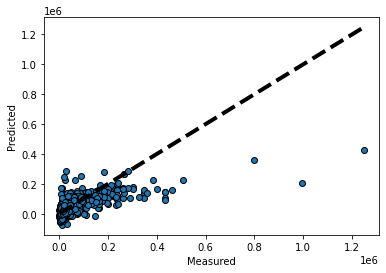

In [450]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [451]:
print("Intercept:", reg_pipe[1].intercept_)
print("Coeficiente:", list(zip(X_train.columns, reg_pipe[1].coef_.flatten(), )))
print("Coeficiente de determinación R^2:", reg_pipe.score(X_train, y_pred))

Intercept: -4299908411954703.0
Coeficiente: [('Unnamed: 0', -15520.649093131364), ('Nationality', 1417.3533823884754), ('Club_Position', -2912.213037982113), ('Height', -7022.555736552857), ('Weight', 2609.7346018482713), ('Preffered_Foot', 15691.835204853629), ('Age', -4703.601773507149), ('Work_Rate', -11028.801906367133), ('Weak_foot', -1610.4842304275885), ('Skill_Moves', 10354.943674495898), ('Ball_Control', -10791.85384615868), ('Dribbling', -2466.354265786482), ('Marking', 29637.231993854468), ('Sliding_Tackle', -4812.840435605973), ('Standing_Tackle', 3916.1794388451112), ('Aggression', 5669.632879048198), ('Reactions', 578.7572828572484), ('Interceptions', -8243.226942342751), ('Vision', 13990.491384987074), ('Composure', 8157.305550803991), ('Crossing', -6025.655220231194), ('Short_Pass', 1741.6070340826327), ('Long_Pass', 2682.6812630871864), ('Acceleration', -8327.821234451869), ('Speed', 4314.067259407369), ('Stamina', 1672.9241634371956), ('Strength', 4212.847159405542), 

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

> Es posible mejorar los resultados eliminando variables que no aporten al modelo, por ejemplo, que no tengan mucha correlación con la variable a predecir. Esto es debido a que las variables que no a portan al modelo, tienden a inflar el valor del R2, manteniendo la contribución de cada una de las variables, pero haciéndolo de forma agregada. Una opción pra mejorar esto es utilizar la métrica del R2 ajustado.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>